# 8-2. 자연어 처리 기초

CountVectorizer

* 각 문장에서 단어 출현 횟수를 카운팅하는 방법 (BOW, Bag Of Word)

TfidfVectorizer

* 다른 문서보다 특정 문서에 자주 나타나는 단어에 높은 가중치를 주는 방법
* TF-IDF(Term Frequency - Inverse Document Frequency)

형태소 분석기

* konlpy: 한국어 처리를 위한 형태소 분석기
* 형태소: 의미를 가지는 요소로서는 더 이상 분석할 수 없는 가장 작은 말의 단위

In [1]:
# 판다스 라이브러리 불러오기
import pandas as pd

In [2]:
# konlpy 설치 [LMS 에는 이미 설치가 되어 있습니다.]
!pip install konlpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 67.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 488.6/488.6 kB 42.4 MB/s eta 0:00:00


In [3]:
# 라이브러리 불러오기 (okt)
import konlpy
from konlpy.tag import Okt
tokenizer = Okt()

In [4]:
# 토큰화 (형태소 단위)
text = "함께 탐험하며 성장하는 AI 학교 AIFFEL"
tokenizer.morphs(text)

['함께', '탐험', '하며', '성장하는', 'AI', '학교', 'AIFFEL']

In [5]:
# 토큰화 (품사 태깅)
tokenizer.pos(text)

[('함께', 'Adverb'),
 ('탐험', 'Noun'),
 ('하며', 'Verb'),
 ('성장하는', 'Adjective'),
 ('AI', 'Alpha'),
 ('학교', 'Noun'),
 ('AIFFEL', 'Alpha')]

## 1. CountVectorizer

In [6]:
# CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()

In [7]:
# 단어 토큰화 (Okt)
words = tokenizer.morphs(text)

In [8]:
# 데이터 학습
vect.fit(words)

CountVectorizer()

In [9]:
# 학습된 어휘
vect.get_feature_names_out()

array(['ai', 'aiffel', '성장하는', '탐험', '하며', '학교', '함께'], dtype=object)

In [10]:
# 단어 사전
vect.vocabulary_

{'함께': 6, '탐험': 3, '하며': 4, '성장하는': 2, 'ai': 0, '학교': 5, 'aiffel': 1}

In [11]:
# 단어 사전 크기
len(vect.vocabulary_)

7

In [12]:
# 인코딩
df_t = vect.transform(words)

In [13]:
# 인코딩된 데이터 Matrix
df_t.toarray()

array([[0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0, 0, 0]])

In [14]:
# 어휘와 피처
import pandas as pd
pd.DataFrame(df_t.toarray(), columns=vect.get_feature_names_out())

,ai,aiffel,성장하는,탐험,하며,학교,함께
0,0,0,0,0,0,0,1
1,0,0,0,1,0,0,0
2,0,0,0,0,1,0,0
3,0,0,1,0,0,0,0
4,1,0,0,0,0,0,0
5,0,0,0,0,0,1,0
6,0,1,0,0,0,0,0


In [15]:
# test
test = "AI 공부하며 함께 성장해요!"

In [16]:
# 단어 토큰화 (Okt)
words = tokenizer.morphs(test)
words

['AI', '공부', '하며', '함께', '성장해요', '!']

In [17]:
#
test_t = vect.transform(words)
test_t.toarray()

array([[1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0]])

In [18]:
pd.DataFrame(test_t.toarray(), columns=vect.get_feature_names_out())

,ai,aiffel,성장하는,탐험,하며,학교,함께
0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0
3,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0


## 2. TfidfVectorizer

In [19]:
#tf-idf
from sklearn.feature_extraction.text import TfidfVectorizer

In [20]:
# tf-idf
vect = TfidfVectorizer()
words = tokenizer.morphs(text)
vect.fit(words)
vect.vocabulary_

{'함께': 6, '탐험': 3, '하며': 4, '성장하는': 2, 'ai': 0, '학교': 5, 'aiffel': 1}

In [21]:
vect.transform(words).toarray()

array([[0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0., 0.]])

## 8-3. 감성 분석

### 1. 데이터 불러오기

In [22]:
# 라이브러리 불러오기
import pandas as pd

In [23]:
# 데이터 불러오기
df = pd.read_csv("https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt", sep="\t")

### 2. EDA 및 데이터 전처리

In [24]:
# 데이터 샘플
df.head()

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


In [25]:
# 데이터 크기
df.shape

(150000, 3)

In [26]:
# 타겟 확인
df['label'].value_counts()

0    75173
1    74827
Name: label, dtype: int64

In [27]:
# 결측치
df.isnull().sum()

id          0
document    5
label       0
dtype: int64

In [28]:
# 결측치 삭제
print(df.shape)
df = df.dropna()
print(df.shape)

(150000, 3)
(149995, 3)


In [29]:
# 피처 엔지니어링 (문장의 길이)
df['len'] = df['document'].apply(len)
df.head()

,id,document,label,len
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0,19
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1,33
2,10265843,너무재밓었다그래서보는것을추천한다,0,17
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0,29
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1,61


<Axes: ylabel='Frequency'>

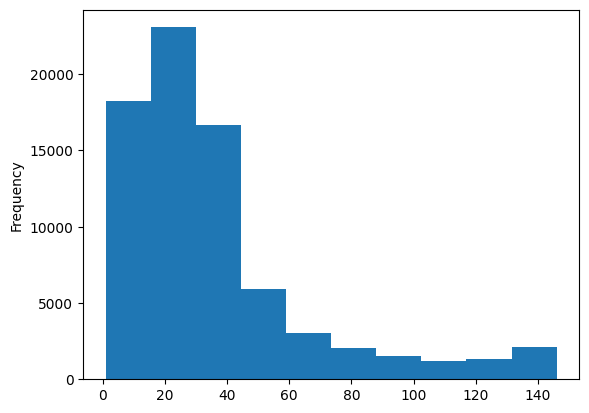

In [30]:
# len 시각화 (label == 0)
import matplotlib.pyplot as plt
df[df.label==0]['len'].plot(kind='hist')

<Axes: ylabel='Frequency'>

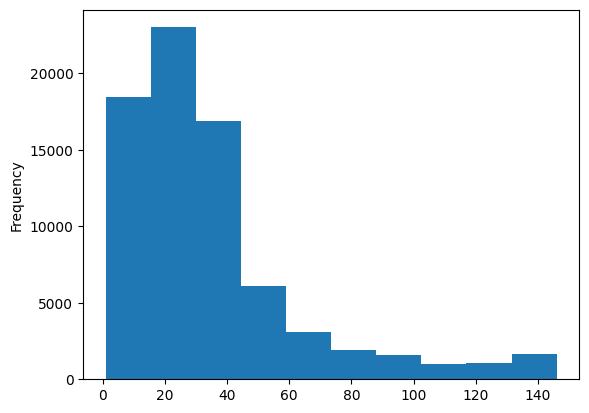

In [31]:
# len 시각화 (label == 1)
df[df.label==1]['len'].plot(kind='hist')

In [32]:
# 데이터 샘플링
df = df[:1000]

In [33]:
# 토큰화
vect = CountVectorizer(tokenizer=tokenizer.morphs)
vectors = vect.fit_transform(df['document'])

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


### 3. 머신러닝 > 교차검증

[리마인드] 교차검증이란?

* 일반적으로 모델을 학습시킬 때 데이터를 train set과 test set으로 나누어 train set을 가지고 학습을 수행합니다.
* 교차검증이란 여기서 train set을 다시 train set과 validation set으로 나누어 학습 중 검증과 수정을 수행하는 것을 의미합니다.

[리마인드] F1 이란?

* 분류 모델의 평가 지표 중 하나로, 정밀도(precision)와 재현율(recall)의 조화평균을 나타냅니다.

<참고> 5. 지도학습(분류) 노드의 5-5. 교차검증, 5-6. 평가(분류) 스텝에서 복습하실 수 있습니다.

In [34]:
# 머신러닝
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

model = RandomForestClassifier(random_state=2022)
cross_val_score(model, vectors, df['label'], scoring='f1', cv=5).mean()

0.6634352457852256

#  8-4. 자연어 전처리

* 어휘 사전 구축
** 00% 이상 나타나는 단어 무시
** 최소 N개의 문장에만 나타나는 단어만 유지
* 불용어(stopword)
** 큰 의미가 없는 단어
** 예) 을, 는, 이, 가, 여기, 저기
* 띄어쓰기
* 반복되는 글자 정리
* 맞춤법 검사

## 1. 어휘 사전 구축

In [35]:
# 토큰화(max_df) N개 보다 큰 단어 수 무시
vect = CountVectorizer(tokenizer=tokenizer.morphs, max_df=10)
vectors = vect.fit_transform(df['document'])
model = RandomForestClassifier(random_state=2022)
cross_val_score(model, vectors, df['label'], scoring='accuracy', cv=5).mean()

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


0.643

In [36]:
# 토큰화(min_df) N개 보다 작은 단어 수 무시
vect = CountVectorizer(tokenizer=tokenizer.morphs, min_df=2)
vectors = vect.fit_transform(df['document'])
model = RandomForestClassifier(random_state=2022)
cross_val_score(model, vectors, df['label'], scoring='accuracy', cv=5).mean()

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


0.689

## 2. 불용어(stopword)

In [37]:
# stop_words
stop_words = ['에서','해요']
vect = CountVectorizer(stop_words=stop_words)
words = tokenizer.morphs(text)
vect.fit(words)
vect.vocabulary_

{'함께': 6, '탐험': 3, '하며': 4, '성장하는': 2, 'ai': 0, '학교': 5, 'aiffel': 1}

## 3. 띄어쓰기
더 자세히: https://github.com/haven-jeon/PyKoSpacing





In [38]:
# 띄어쓰기
from pykospacing import Spacing
spacing = Spacing()

text = "함께탐험하며성장하는AI학교아이펠"
spacing_test = spacing(text)
print(text)
print(spacing_test)

ModuleNotFoundError: No module named 'pykospacing'

## 4. 반복되는 글자 정리

더 자세히: https://github.com/lovit/soynlp

In [39]:
# soynlp 설치
!pip install soynlp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 416.8/416.8 kB 8.5 MB/s eta 0:00:00


In [40]:
# 댓글 데이터에 등장하는 반복되는 이모티콘의 정리
from soynlp.normalizer import *

emoticon_normalize('하하하하ㅋㅋㅋㅋㅋㅠㅠㅠㅠㅠㅠ', num_repeats=3)

'하하하ㅋㅋㅋㅠㅠㅠ'

## 5. 맞춤법 검사기

더 자세히: https://github.com/ssut/py-hanspell

In [41]:
# py-hanspell 설치
!pip install git+https://github.com/ssut/py-hanspell.git

  Cloning https://github.com/ssut/py-hanspell.git to /tmp/pip-req-build-fkiporpu
  Running command git clone --filter=blob:none --quiet https://github.com/ssut/py-hanspell.git /tmp/pip-req-build-fkiporpu
  Resolved https://github.com/ssut/py-hanspell.git to commit fdc6ca50c19f1c85971437a072d89d4e5ce024b8
  Preparing metadata (setup.py) ... done
  Created wheel for py-hanspell: filename=py_hanspell-1.1-py3-none-any.whl size=4809 sha256=a39b9d35bde0f72afc5f735429f481710f1cfef93f4e4d84ec5b31c7b3737950
  Stored in directory: /tmp/pip-ephem-wheel-cache-sd5s1nqz/wheels/2e/43/cc/753c9e1d91affb9ea40e186cea5654fb9231deb454da6724e5
Successfully built py-hanspell


In [42]:
# 맞춤법 검사
from hanspell import spell_checker
text = '알파고 이전, 2015년부터 만들 어진 최초의AI 커뮤니티 모두의연구소.학연, 지연, 모두연이라는 말이나올만큼 AI의 보금자리로서 중요한 역할을 하고있는 모두의연구소에서 만들었습니다. AI기술을 커뮤니티로 배우는 유일 한 기관 아이펠과 함께 밝은 미래를 만들어보세요.'
result = spell_checker.check(text)
result.as_dict()

KeyError: 'result'

In [43]:
# 수정된 문장
result.checked

NameError: name 'result' is not defined